![](https://i.imgur.com/zkhjRGO.png
 "Datos")

# Análisis de propiedades de CABA y GBA publicadas en Properati entre 2013 y 2017


### 1 - Pre procesamiento:
- 1.1 - Análisis de datasets dados por properati
- 1.2 - Generación de un único dataset con más información

### 2 - Análisis por barrios
- 2.1 - Barrios de mayor precio por m2
- 2.2 - Barrios de mayor precio por propiedad (GBA y CABA
- 2.3 - Top de propiedades más caras por barrio

### 3 - Análisis de propiedades más comunes
- 3.1 - Distribución por tipo de propiedad

### 4 - Análisis geográfico
- 4.1 - Variación del precio respecto a cercanía al Obelisco

### 5 - Análisis histórico
- 5.1 - Análisis de fluctuación de precios

### 6 - Análisis de puntos de interés
- 6.1 - Líneas de subte
- 6.2 - Escuelas
- 6.3 - Hospitales

### 7 - Análisis de precios vs contaminación sonora
- 7.1 - Vs promedio de decibeles por barrio

### 8- Comparación de precio de propiedades con otras variables económicas
- 8.1 - Vs Dólar
- 8.2 - Vs Salario Mínimo
- 8.3 - Vs Inflación del Peso


In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from datetime import timedelta, date
import matplotlib.dates as mdates
import geopandas as gpd
import shapely

%matplotlib inline

## 1 - Pre procesamiento:

### 1.1 - Análisis de datasets dados por properati

Se analizan los datos provistos por Properati en el dataset de Agosto del 2017.

In [3]:
properties = pd.read_csv('data/props/properati-AR-2017-08-01-properties-sell.csv')

IOError: File data/props/properati-AR-2017-08-01-properties-sell.csv does not exist

#### Eliminamos duplicados y datos sin precio por metro cuadrado

In [4]:
properties.drop_duplicates(inplace=True)
properties.dropna(subset=['price_usd_per_m2'], inplace=True)

NameError: name 'properties' is not defined

#### Contamos los datos por año

In [5]:
def showCountPerYear(dataframe):
    quantityPerYear = {'2013':len(dataframe.loc[dataframe.created_on.str.contains('2013'), :])\
                            ,'2014': len(dataframe.loc[dataframe.created_on.str.contains('2014'), :])\
                            ,'2015': len(dataframe.loc[dataframe.created_on.str.contains('2015'), :])\
                            ,'2016': len(dataframe.loc[dataframe.created_on.str.contains('2016'), :])\
                            ,'2017': len(dataframe.loc[dataframe.created_on.str.contains('2017'), :])}
    print pd.Series(quantityPerYear)

#### Observamos que hay muy pocos datos de los primeros años, sobre todo del 2013.
Revisando los datos en el último conjunto provisto (Agosto 2017) se especula con la posibilidad de que sólo se tomen las publicaciones activas a la hora de crear el dataset.
Por esto, se vas a analizar los demás sets de datos provistos por properati, con el objetivo de tener más información sobre esos años.

In [6]:
dfAgosto2013 = pd.read_csv('data/props/2013/properati-AR-2013-08-01-properties-sell.csv')
dfSept2013 = pd.read_csv('data/props/2013/properati-AR-2013-09-01-properties-sell.csv')
dfOct2013 = pd.read_csv('data/props/2013/properati-AR-2013-10-01-properties-sell.csv')
dfNov2013 = pd.read_csv('data/props/2013/properati-AR-2013-11-01-properties-sell.csv')
dfDic2013 = pd.read_csv('data/props/2013/properati-AR-2013-12-01-properties-sell.csv')

dfEnero2014 = pd.read_csv('data/props/2014/properati-AR-2014-01-01-properties-sell.csv')
dfFeb2014 = pd.read_csv('data/props/2014/properati-AR-2014-02-01-properties-sell.csv')
dfMar2014 = pd.read_csv('data/props/2014/properati-AR-2014-03-01-properties-sell.csv')
dfAbril2014 = pd.read_csv('data/props/2014/properati-AR-2014-04-01-properties-sell.csv')
dfMayo2014 = pd.read_csv('data/props/2014/properati-AR-2014-05-01-properties-sell.csv')
dfJun2014 = pd.read_csv('data/props/2014/properati-AR-2014-06-01-properties-sell.csv')
dfJul2014 = pd.read_csv('data/props/2014/properati-AR-2014-07-01-properties-sell.csv')
dfAgo2014 = pd.read_csv('data/props/2014/properati-AR-2014-08-01-properties-sell.csv')
dfSept2014 = pd.read_csv('data/props/2014/properati-AR-2014-09-01-properties-sell.csv')
dfOct2014 = pd.read_csv('data/props/2014/properati-AR-2014-10-01-properties-sell.csv')
dfNov2014 = pd.read_csv('data/props/2014/properati-AR-2014-11-01-properties-sell.csv')
dfDic2014 = pd.read_csv('data/props/2014/properati-AR-2014-12-01-properties-sell.csv')

dfEnero2015 = pd.read_csv('data/props/2015/properati-AR-2015-01-01-properties-sell.csv')
dfFeb2015 = pd.read_csv('data/props/2015/properati-AR-2015-02-01-properties-sell.csv')
dfMar2015 = pd.read_csv('data/props/2015/properati-AR-2015-03-01-properties-sell.csv')
dfAbril2015 = pd.read_csv('data/props/2015/properati-AR-2015-04-01-properties-sell.csv')
dfMayo2015 = pd.read_csv('data/props/2015/properati-AR-2015-05-01-properties-sell.csv')
dfJul2015 = pd.read_csv('data/props/2015/properati-AR-2015-07-01-properties-sell.csv')
dfAgo2015 = pd.read_csv('data/props/2015/properati-AR-2015-08-01-properties-sell.csv')
dfSept2015 = pd.read_csv('data/props/2015/properati-AR-2015-09-01-properties-sell.csv')
dfOct2015 = pd.read_csv('data/props/2015/properati-AR-2015-10-01-properties-sell.csv')
dfNov2015 = pd.read_csv('data/props/2015/properati-AR-2015-11-01-properties-sell.csv')
dfDic2015 = pd.read_csv('data/props/2015/properati-AR-2015-12-01-properties-sell.csv')

dfEnero2016 = pd.read_csv('data/props/2016/properati-AR-2016-01-01-properties-sell.csv')
dfFeb2016 = pd.read_csv('data/props/2016/properati-AR-2016-02-01-properties-sell.csv')
dfMar2016 = pd.read_csv('data/props/2016/properati-AR-2016-03-01-properties-sell.csv')
dfAbril2016 = pd.read_csv('data/props/2016/properati-AR-2016-04-01-properties-sell.csv')
dfMayo2016 = pd.read_csv('data/props/2016/properati-AR-2016-05-01-properties-sell.csv')
dfJun2016 = pd.read_csv('data/props/2016/properati-AR-2016-06-01-properties-sell.csv')
dfJul2016 = pd.read_csv('data/props/2016/properati-AR-2016-07-01-properties-sell.csv')
dfAgo2016 = pd.read_csv('data/props/2016/properati-AR-2016-08-01-properties-sell.csv')
dfSept2016 = pd.read_csv('data/props/2016/properati-AR-2016-09-01-properties-sell.csv')
dfOct2016 = pd.read_csv('data/props/2016/properati-AR-2016-10-01-properties-sell.csv')
dfNov2016 = pd.read_csv('data/props/2016/properati-AR-2016-11-01-properties-sell.csv')
dfDic2016 = pd.read_csv('data/props/2016/properati-AR-2016-12-01-properties-sell.csv')

dfEnero2017 = pd.read_csv('data/props/2017/properati-AR-2017-01-01-properties-sell.csv')
dfAgostoSixMonths2017 = pd.read_csv('data/props/2017/properati-AR-2017-08-01-properties-sell-six_months.csv')

properties = pd.concat([dfAgosto2013,dfSept2013,dfOct2013,dfNov2013,dfDic2013,dfEnero2014,dfFeb2014,dfMar2014, dfAbril2014,dfMayo2014,dfJun2014,dfJul2014,dfAgo2014,dfSept2014,dfOct2014,dfNov2014,dfDic2014,dfEnero2015, dfFeb2015, dfMar2015, dfAbril2015, dfMayo2015,dfJul2015,dfAgo2015,dfSept2015,dfOct2015, dfNov2015, dfDic2015,dfEnero2016,dfFeb2016,dfMar2016, dfAbril2016,dfMayo2016,dfJun2016,dfJul2016, dfAgo2016, dfSept2016,dfOct2016, dfNov2016, dfDic2016,dfEnero2017,dfAgostoSixMonths2017])

IOError: File data/props/2013/properati-AR-2013-08-01-properties-sell.csv does not exist

### 1.2 - Generación de un dataset con más información

In [7]:
properties.info()

NameError: name 'properties' is not defined

In [8]:
len(properties)

NameError: name 'properties' is not defined

#### Se eliminan duplicados

In [9]:
properties.drop_duplicates(inplace=True)

NameError: name 'properties' is not defined

In [10]:
showCountPerYear(properties)

NameError: name 'properties' is not defined

In [11]:
len(properties)

NameError: name 'properties' is not defined

#### Se eliminan los que no tengan precio por metro cuadrado, se guardan los demás para posible recuperación de esa información

In [13]:
propertiesWithoutM2Price = properties[pd.isnull(properties['price_usd_per_m2'])]

In [14]:
properties.dropna(subset=['price_usd_per_m2'], inplace=True)

In [15]:
recoverablePropertiesData = propertiesWithoutM2Price[pd.notnull(propertiesWithoutM2Price['surface_covered_in_m2']) & pd.notnull(propertiesWithoutM2Price['price_aprox_usd']) & pd.notnull(propertiesWithoutM2Price['price'])]

In [16]:
len(recoverablePropertiesData.loc[recoverablePropertiesData.created_on.str.contains('2013'), :])

642

In [17]:
len(properties.loc[properties.created_on.str.contains('2013'), :])

397179

Se desestiman los datos que podrían recuperarse calculando el precio por metro cuadrado, al ser muchos menos que los que lo tienen directamente.

#### Checkpoint para analizar del estado de los datos por año

In [18]:
showCountPerYear(properties)

2013    397179
2014    380698
2015    327666
2016     59761
2017     75953
dtype: int64


Se ve que los años 2013, 2014 y 2015 cuentan con muchos más datos que los años más recientes. Se analiza por qué.

#### Analizo propiedades que compartan ciertas características, que den a sospechar una re-publicación, lo cual alteraría el análisis teniendo en cuenta una propiedad más de una vez.

In [20]:
republishedCandidates = properties[properties.duplicated(subset=['title','property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name', 'expenses'])]
showCountPerYear(republishedCandidates)

2013    268796
2014    252634
2015    139518
2016      2557
2017      4620
dtype: int64


#### Se aprecia que en los años donde había demasiados más datos, encontramos muchas potenciales re-publicaciones.
Se borran las mismas.

In [21]:
properties.drop_duplicates(subset=['title','property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name', 'expenses'], inplace=True)

In [22]:
showCountPerYear(properties)

2013    128383
2014    128064
2015    188148
2016     57204
2017     71333
dtype: int64


#### Vemos que sigue habiendo mucha diferencia, aunque se redujo notablemente. Hilamos más fino.

In [23]:
republishedCandidates = properties[properties.duplicated(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'])]
showCountPerYear(republishedCandidates)

2013     4186
2014    19420
2015    53629
2016     2737
2017     5644
dtype: int64


#### Tomamos una muestra para ver si este filtro es excesivo

In [24]:
republishedCandidates = properties[properties.duplicated(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'])]

In [25]:
republishedCandidates.groupby(['property_type', 'rooms', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id']).count()

country_name  \
property_type rooms surface_in_m2 price     price_aprox_usd price_usd_per_m2 geonames_id                 
PH            1.0   19.0          35000.0   35000.00        1842.105263      3430863.0               0   
                    20.0          26000.0   26000.00        1300.000000      3430863.0               0   
                                  27000.0   27000.00        1350.000000      3428123.0               0   
                    23.0          50000.0   50000.00        2173.913043      3430116.0               0   
                    24.0          49000.0   49000.00        2041.666667      3430114.0               0   
                    25.0          50000.0   50000.00        2000.000000      3430116.0               0   
                                  70000.0   70000.00        2800.000000      3435506.0               0   
                    26.0          50000.0   50000.00        1923.076923      3430863.0               0   
                                  50500.0   50500.00        1942.307692      3430863.0               0   
                    27.0          55000.0   55000.00        2037.037037      3430116.0               0   
                    28.0          49500.0   49500.00        1767.857143      3430863.0               0   
                                  50500.0   50500.00        1803.571429      3430863.0               0   
                                  51000.0   51000.00        1821.428571      3430863.0               0   
                    30.0          25000.0   25000.00        833.333333       3430863.0               0   
                                  38000.0   38000.00        1266.666667      3433778.0               0   
                                  45000.0   45000.00        1500.000000      3430863.0               0   
                                  47000.0   47000.00        1566.666667      3430863.0               0   
                                  48000.0   48000.00        1600.000000      3430863.0               0   
                                  49000.0   49000.00        1633.333333      3430863.0               0   
                                  50500.0   50500.00        1683.333333      3430863.0               0   
                                  51000.0   51000.00        1700.000000      3430863.0               0   
                                  52000.0   52000.00        1733.333333      3430863.0               0   
                                  53000.0   53000.00        1766.666667      3430863.0               0   
                                  60000.0   60000.00        2000.000000      3430116.0               0   
                                  65000.0   65000.00        2166.666667      3430116.0               0   
                                  70000.0   70000.00        2333.333333      3430116.0               0   
                                                                             3435506.0               0   
                                  80000.0   80000.00        2666.666667      3427407.0               0   
                    31.0          55000.0   55000.00        1774.193548      3430116.0               0   
                                                                             3430863.0               0   
...                                                                                                ...   
store         1.0   175.0         350000.0  350000.00       2000.000000      3433787.0               0   
                    180.0         250000.0  250000.00       1388.888889      6693229.0               0   
                                  450000.0  450000.00       2500.000000      3436077.0               0   
                    192.0         3500000.0 3500000.00      18229.166667     3441011.0               0   
                    265.0         290000.0  290000.00       1094.339623      3436003.0               0   
                                  320000.0  320000.00       12

In [26]:
df = republishedCandidates[(republishedCandidates['property_type'] == 'PH')\
 & (republishedCandidates['rooms'] == 1)\
 & (republishedCandidates['surface_in_m2'] == 19)]

In [27]:
df

,country_name,created_on,currency,description,expenses,extra,floor,geonames_id,id,image_thumbnail,...,price_per_m2,price_usd_per_m2,properati_url,property_type,rooms,state_name,surface_covered_in_m2,surface_in_m2,surface_total_in_m2,title
23420,NaN,2014-06-11,USD,Excelente local independiente <br>\nA 1 cuadra...,NaN,"{""images"":[""http://www.inmokey.com/files/c-196...",NaN,3430863.0,NaN,http://d1t4y5hzjn9jnl.cloudfront.net/p6mteeIay...,...,NaN,1842.105263,http://www.properati.com.ar/gir4_venta_ph_mar-...,PH,1.0,NaN,NaN,19.0,NaN,PH en Venta. 1 Ambiente. 19 m2. 19 m2c. Local ...
79974,NaN,2015-05-14,USD,Excelente local independiente A 1 cuadra de Av...,NaN,"{""address"":""Calle sin nombre"",""original_url"":""...",NaN,3430863.0,NaN,http://thumbs3.properati.com/3/FDBjKmrvhu5waZ6...,...,NaN,1842.105263,http://mar-del-plata.properati.com.ar/plcb_ven...,PH,1.0,NaN,NaN,19.0,NaN,Local independiente ESPAÑA y FALUCHO. 1 Ambien...


In [28]:
df.loc[23420, 'image_thumbnail']

'http://d1t4y5hzjn9jnl.cloudfront.net/p6mteeIayISZ_Fi-Ie4HT5XqPT8=/trim/198x0/smart/filters:strip_icc()/www.inmokey.com/files/c-1965/properties/2/7/p-71027-300114050947-766704.jpg'

In [29]:
df.loc[79974, 'image_thumbnail']

'http://thumbs3.properati.com/3/FDBjKmrvhu5waZ6BJD2P_tjDQyo=/trim/198x0/smart/filters:strip_icc()/cdn.inmokey.com/properties/2/7/p-71027-300114050947-766704.jpg'

#### Visitando los links, se ve que corresponde a la misma propiedad. Si bien podría ser correcto mantener las re publicaciones, se borrarán dejando la primer aparición del duplicado, ya que contempla el precio dado a la propiedad al momento de publicarse por primera vez (que luego se mantuvo).

In [30]:
properties.drop_duplicates(subset=['property_type', 'rooms', 'surface_covered_in_m2', 'surface_in_m2', 'price', 'price_aprox_usd', 'price_usd_per_m2', 'geonames_id', 'state_name'], inplace=True)

In [31]:
showCountPerYear(properties)

2013    124197
2014    108644
2015    134519
2016     54467
2017     65689
dtype: int64


#### Utilizaremos el set de datos filtrado para el análisis

# 2- Analisis por barrios 

In [3]:
data = pd.read_csv('datos_procesados.csv',low_memory = False)

In [4]:
#Filtro los datos que me interesan (estado, barrio, superficie, precio, y ubicacion)
data2 = data[['state_name','place_name','surface_covered_in_m2','price_per_m2','lat','lon']].copy()

#Limpio los Na
data2.dropna(inplace = True)

#Agrego una columna con el precio de la propiedad (superficie*precio por m2)
data2['precio_propiedad'] = data2['surface_covered_in_m2']*data2['price_per_m2']

#Separo los datos de Capital Federal y Gran Buenos Aires
dataCF = data2[data2['state_name']== 'Capital Federal']
dataGBA = data2.loc[data2.state_name.str.contains('G.B.A.'),:]

#Armo un join de ambos datos
dataCFGBA = pd.concat([dataCF, dataGBA])

print(len(dataCF))
print(len(dataGBA))
print(len(dataCFGBA))

35129
31464
66593


In [5]:
dataCFGBA.sample(10)

,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
365316,Capital Federal,Caballito,220.0,1590.909091,-34.636008,-58.442412,3.500000e+05
438770,Bs.As. G.B.A. Zona Oeste,Morón,34.0,1764.705882,-34.656919,-58.619323,6.000000e+04
406435,Bs.As. G.B.A. Zona Norte,La Lucila,91.0,5439.560440,-34.495802,-58.484476,4.950000e+05
441005,Capital Federal,Almagro,55.0,2509.090909,-34.605648,-58.424471,1.380000e+05
390735,Bs.As. G.B.A. Zona Sur,Adrogué,81.0,2222.222222,-34.804839,-58.398003,1.800000e+05
412462,Bs.As. G.B.A. Zona Norte,Tigre,197.0,1512.690355,-34.425087,-58.579658,2.980000e+05
404457,Capital Federal,Belgrano,68.0,2397.058824,-34.565119,-58.468933,1.630000e+05
419506,Capital Federal,Agronomía,40.0,2200.000000,-34.597861,-58.483106,8.800000e+04
395378,Bs.As. G.B.A. Zona Norte,Pilar,112.0,47604.241071,-34.442989,-58.738856,5.331675e+06
369816,Bs.As. G.B.A. Zona Norte,San Isidro,37.0,2081.081081,-34.468279,-58.510723,7.700000e+04


/home/matias/anaconda2/envs/geoenv/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


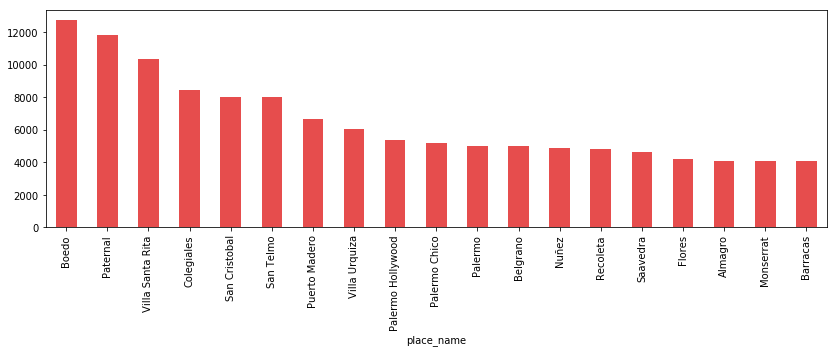

In [6]:
dataCF['barrio']= dataCF.place_name.str.upper().copy()
#Barrios de mayor precio por metro cuadrado en Capital Federal
preciom2=dataCF.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].copy()
preciom2.plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3))

In [7]:
# Datos para plotear el mapa con Geopandas
barrios_csv = pd.read_csv('/home/matias/Escritorio/Geopandas/barrios.csv')
barrios_csv1 = barrios_csv[['WKT']]
# Shapefile
barrios = gpd.read_file('/home/matias/Escritorio/Enviroment/barrios_badata.shp') 
barrios_pd = pd.concat([barrios, barrios_csv1], axis=1)
barrios_pd.sort_values(by='BARRIO', ascending=True)
barrios_total = barrios_pd.merge(dataCF, left_on='BARRIO',right_on='barrio', how='inner')
barrios_total.head()

,BARRIO,COMUNA,PERIMETRO,AREA,geometry,WKT,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad,barrio
0,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,57.0,2017.543860,-34.583245,-58.455779,115000.0,CHACARITA
1,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,35.0,2428.571429,-34.572512,-58.394726,85000.0,CHACARITA
2,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,54.0,2961.111111,-34.591538,-58.447410,159900.0,CHACARITA
3,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,31.0,2580.645161,-34.585998,-58.454436,80000.0,CHACARITA
4,CHACARITA,15.0,7725.695228,3.118101e+06,"POLYGON ((100961.3380000005 103691.9736000001,...","POLYGON ((-58.4528200492791 -34.5959886570639,...",Capital Federal,Chacarita,33.0,2424.242424,-34.572512,-58.394726,80000.0,CHACARITA


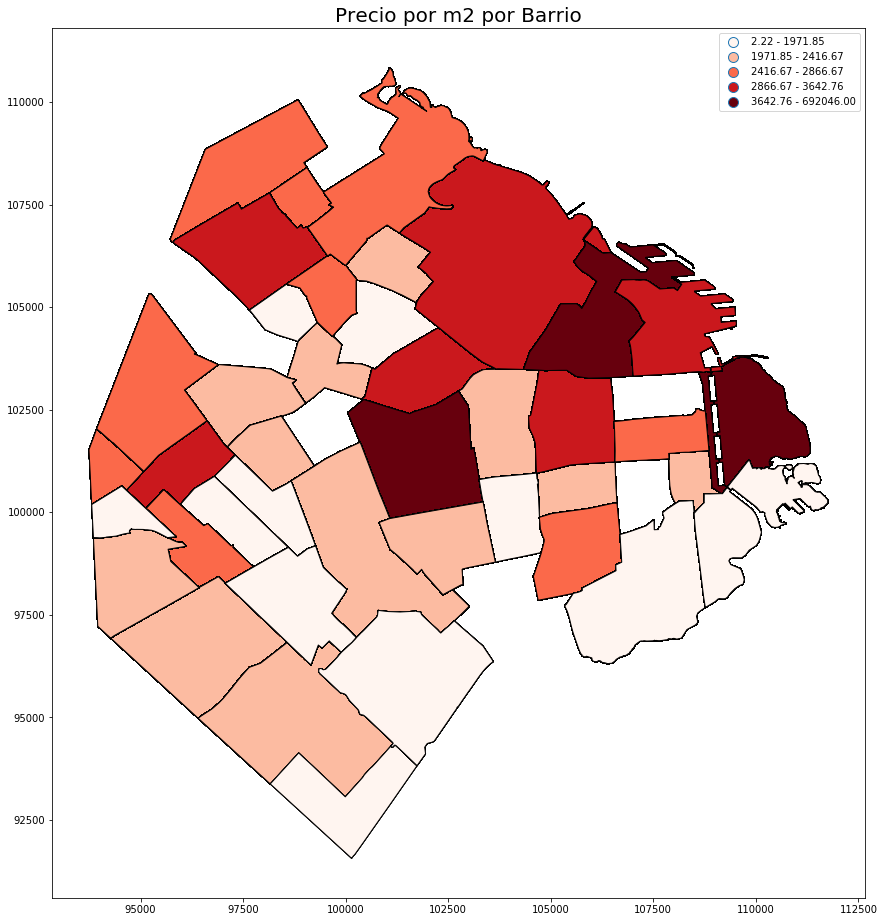

In [8]:
barrios_total.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)
figsize=(10,10)
ax = barrios_total.plot(legend=True, column='price_per_m2', cmap='Reds', scheme="Quantiles", figsize= (18,16),edgecolor='black')
plt.title('Precio por m2 por Barrio', fontsize = 20)

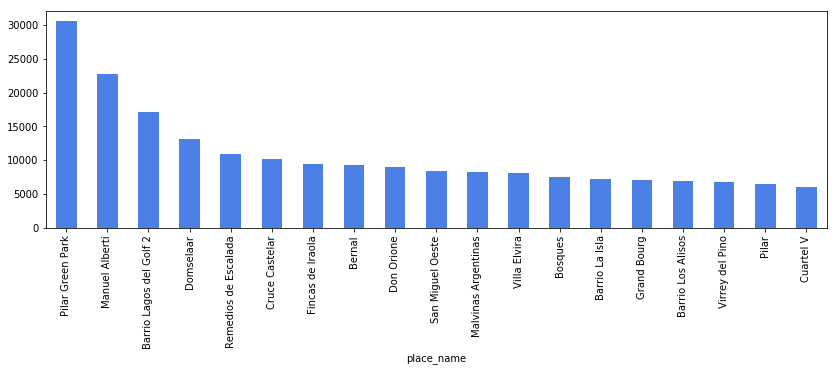

In [9]:
#Barrios de mayor precio por metro cuadrado en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['price_per_m2'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

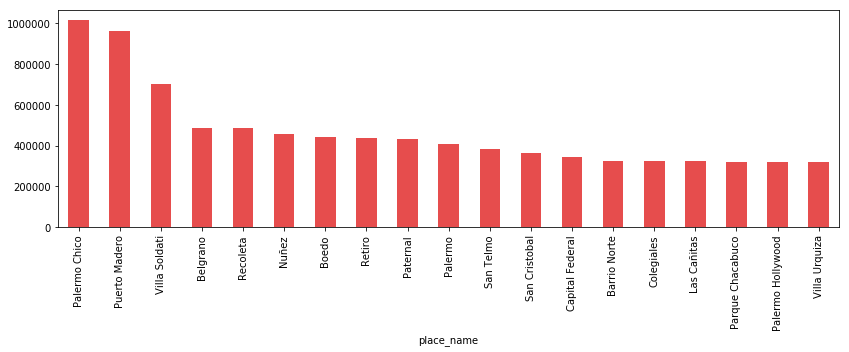

In [10]:
#Barrios de mayor precio de propiedad en Capital Federal
dataCF.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.9,0.3,0.3));

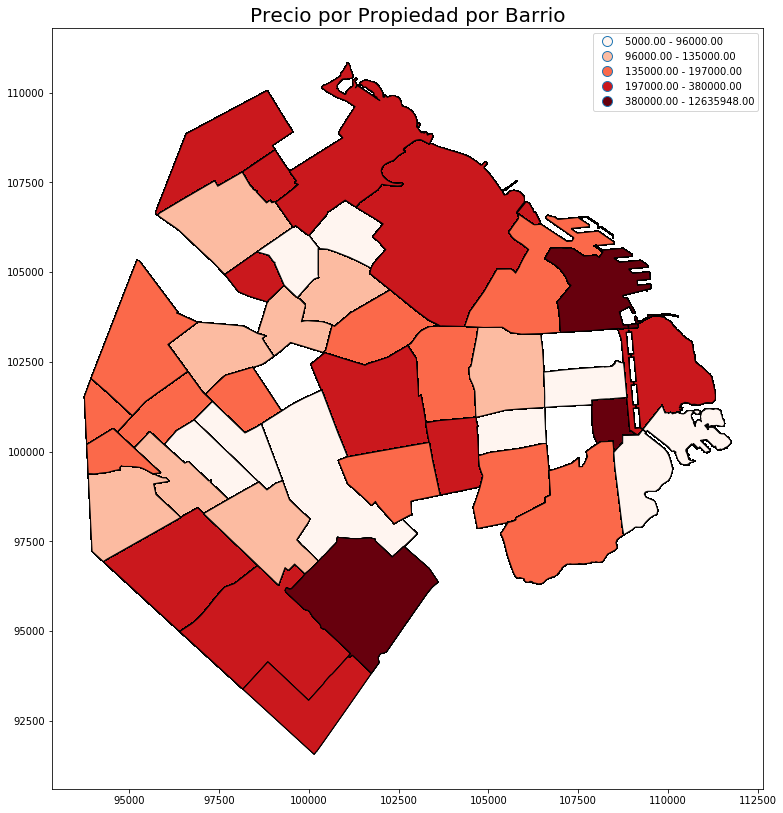

In [22]:
# plot the shapefile using plot()
figsize=(16,14)
ax = barrios_total.plot(legend=True, column='precio_propiedad', cmap='Reds', scheme="Quantiles", figsize= (figsize),edgecolor='black')
plt.title('Precio por Propiedad por Barrio', fontsize = 20)

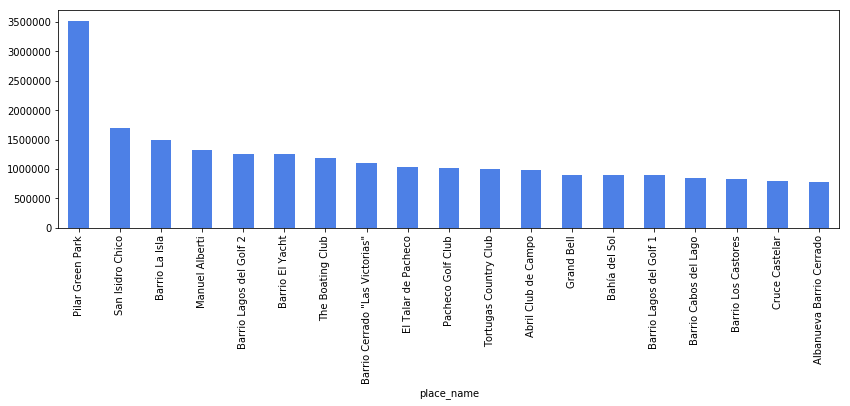

In [12]:
#Barrios de mayor precio de propiedad en Gran Buenos Aires
dataGBA.groupby('place_name').mean()['precio_propiedad'].sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4),color=(0.3,0.5,0.9));

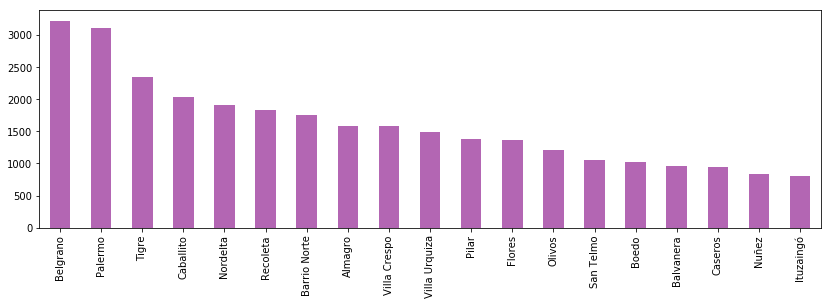

In [13]:
#Barrios con mayor numero de propiedades (GBA y CF)

dataCFGBA['place_name'].value_counts()[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

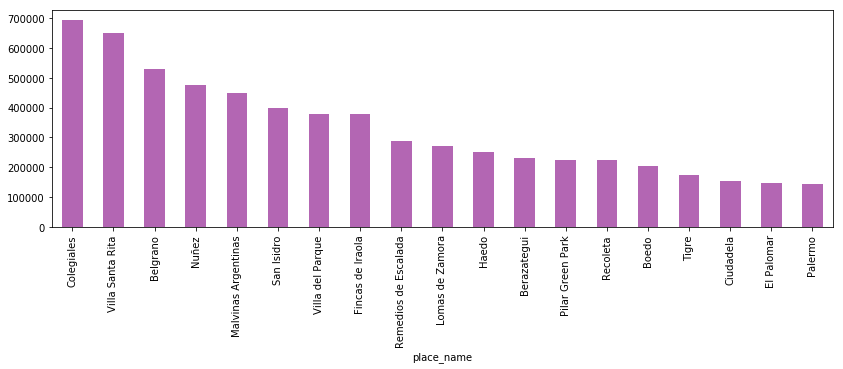

In [14]:
#Propiedades con mayor precio por metro cuadrado por barrio
dataCFGBA.groupby(['place_name'], sort=False)['price_per_m2'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

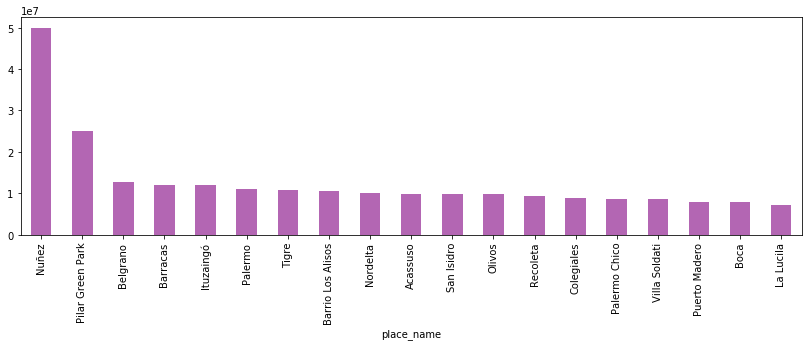

In [15]:
#Propiedades más caras por barrio

dataCFGBA.groupby(['place_name'], sort=False)['precio_propiedad'].max().sort_values(ascending=False)[0:19].plot(kind='bar',figsize=(14,4), color=(0.7,0.4,0.7));

In [16]:
#Top 10 propiedades más caras
dataCFGBA.sort_values(['precio_propiedad'], ascending=False).head(10)

,state_name,place_name,surface_covered_in_m2,price_per_m2,lat,lon,precio_propiedad
466909,Capital Federal,Nuñez,105.0,476190.476190,-34.548221,-58.455716,5.000000e+07
466910,Capital Federal,Nuñez,105.0,476190.476190,-34.548221,-58.455716,5.000000e+07
368761,Bs.As. G.B.A. Zona Norte,Pilar Green Park,111.0,225225.225225,-34.455906,-58.908329,2.500000e+07
480994,Capital Federal,Belgrano,138.0,91564.840580,-34.569867,-58.457581,1.263595e+07
423346,Capital Federal,Barracas,5000.0,2400.000000,-34.641421,-58.374063,1.200000e+07
491599,Bs.As. G.B.A. Zona Oeste,Ituzaingó,85.0,141176.470588,-34.657171,-58.682625,1.200000e+07
481042,Capital Federal,Belgrano,138.0,86550.869565,-34.569867,-58.457581,1.194402e+07
480958,Capital Federal,Belgrano,138.0,84857.289855,-34.569867,-58.457581,1.171031e+07
480989,Capital Federal,Belgrano,138.0,83185.992754,-34.569867,-58.457581,1.147967e+07
481002,Capital Federal,Belgrano,138.0,81559.260870,-34.569867,-58.457581,1.125518e+07


In [19]:
#¿La cercanía al centro afecta los precios?

#Coordenadas del obelisco: 34°36′11″S 58°22′54″O / -34.603075, -58.381653
obelisco_lon=-58.381653
obelisco_lat=-34.603075

#le agrego a los datos de Capital Federal una columna con la distancia al centro (tomo el obelisco como referencia)
dataCF['dist_centro'] = np.absolute(dataCF['lon'] - obelisco_lon)+ np.absolute(dataCF['lat'] - obelisco_lat).copy()

/home/matias/anaconda2/envs/geoenv/lib/python2.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


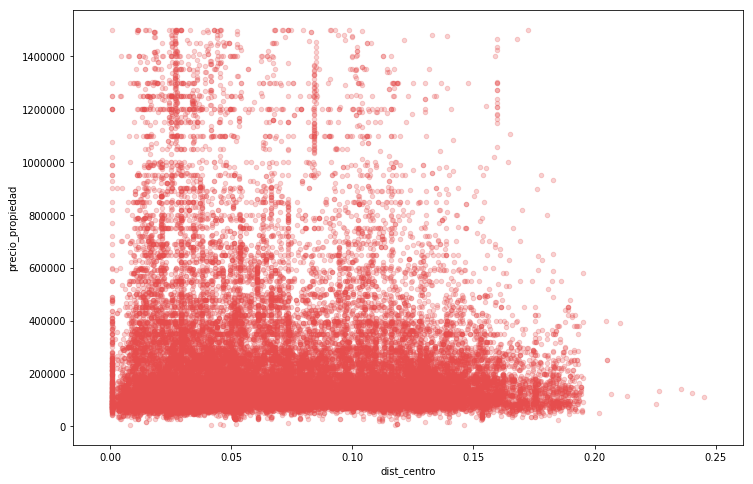

In [21]:
#Armo scatter plot con relación entre la distancia al obelisco y el precio
dataCF1 = dataCF[dataCF['precio_propiedad']< 1500000]
dataCF2 = dataCF1[dataCF1['dist_centro']< 0.4]
dataCF2.plot.scatter('dist_centro', 'precio_propiedad',alpha=0.25, figsize=(12,8), color=(0.9,0.3,0.3))

## 8- Comparación de precio de propiedades con otras variables económicas
Analizar la variación de los precios de propiedades en comparación a algunas variables económicas, para desprender conclusiones como:
- ¿Podemos asociar el valor del dólar a los precios de las propiedades?
- ¿Podemos asociar la inflación del peso a los precios de las propiedades?
- ¿Podemos asociar el valor del salario mínimo a los precios de las propiedades?
- ¿Qué puede decirse sobre la “accesibilidad” a la compra de propiedades?

### 8.1 - Vs Dólar

In [32]:
propertiesEconomicAnalysis = properties

#### Nos quedamos con datos bajo el percentil 95 para eliminar ruido

In [33]:
propertiesEconomicAnalysis = propertiesEconomicAnalysis.loc[propertiesEconomicAnalysis.price_per_m2 < propertiesEconomicAnalysis.price_per_m2.quantile(0.85), :]

In [34]:
propertiesEconomicAnalysis['created_on'] = pd.to_datetime(propertiesEconomicAnalysis['created_on'], format = "%Y-%m-%d")
propertiesEconomicAnalysis['year_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: x.year)
propertiesEconomicAnalysis['month_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: x.month)
propertiesEconomicAnalysis['month_year_created'] = propertiesEconomicAnalysis['created_on'].map(lambda x: str(x.month) + '-' + str(x.year))

/Users/mreverter/PythonProjects/datos/tp1-repo/Datos/env/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Users/mreverter/PythonProjects/datos/tp1-repo/Datos/env/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/mreverter/PythonProjects/datos/tp1-repo/Datos/env/lib/python2.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice f

#### ¿Podemos asociar el valor del dólar a los precios de las propiedades?

Normalizamos los valores del metro cuadrado y del dolar, y comparamos su variación.

In [35]:
dolarEvolution = pd.read_csv('data/economic/dolar-daily.csv')
dolarEvolution = dolarEvolution.loc[:,['date', 'open']]

In [36]:
#Normalizamos valor del dolar
max_value = dolarEvolution['open'].max()
min_value = dolarEvolution['open'].min()
normalized = (dolarEvolution['open'] - min_value) / (max_value - min_value)

In [37]:
dolarEvolution['normalized'] = normalized

In [38]:
propertiesNormDf = propertiesEconomicAnalysis.loc[:,['created_on', 'year_created', 'month_created', 'month_year_created', 'price_usd_per_m2', 'price_per_m2']]

In [39]:
#Obtengo columna de precios en pesos normalizada
max_value = propertiesNormDf['price_per_m2'].max()
min_value = propertiesNormDf['price_per_m2'].min()
propertiesPriceNormalized = (propertiesNormDf['price_per_m2'] - min_value) / (max_value - min_value)
propertiesNormDf['price_m2_normalized'] = propertiesPriceNormalized

In [40]:
#Obtengo columna de precios en dolares normalizada
max_value = propertiesNormDf['price_usd_per_m2'].max()
min_value = propertiesNormDf['price_usd_per_m2'].min()
propertiesPriceNormalized = (propertiesNormDf['price_usd_per_m2'] - min_value) / (max_value - min_value)
propertiesNormDf['price_usd_m2_normalized'] = propertiesPriceNormalized

In [41]:
dolarEvolution['date'] = pd.to_datetime(dolarEvolution['date'], format = "%d.%m.%Y")
dolarEvolution['year-month'] = dolarEvolution['date'].map(lambda x: str(x.month) + '-' + str(x.year))
dolarEvolution['year'] = dolarEvolution['date'].map(lambda x: x.year)
dolarEvolution['month'] = dolarEvolution['date'].map(lambda x: x.month)

In [42]:
dolarPriceByMonth = (dolarEvolution.groupby('year-month').mean().reset_index()).sort_values(by=['year','month'])
dolarPriceByMonth = dolarPriceByMonth.loc[:,['year-month', 'normalized']].rename(columns={'normalized':'value'})
dolarPriceByMonth.rename(columns={'year-month':'Mes', 'value':'Evolucion Dolar'}, inplace=True)

In [43]:
propertiesPriceGroupedByMonth = (propertiesNormDf.groupby(['month_year_created']).mean().reset_index()).loc[:,['month_created', 'year_created', 'month_year_created', 'price_m2_normalized']].sort_values(by=['year_created', 'month_created'])
propertiesPriceGroupedByMonth = propertiesPriceGroupedByMonth.loc[:, ['month_year_created', 'price_m2_normalized']]
propertiesPriceGroupedByMonth.rename(columns={'month_year_created':'Mes', 'price_m2_normalized':'Evolucion $/m2'}, inplace=True)

In [44]:
propertiesPriceUSDGroupedByMonth = (propertiesNormDf.groupby(['month_year_created']).mean().reset_index()).loc[:,['month_created', 'year_created', 'month_year_created', 'price_usd_m2_normalized']].sort_values(by=['year_created', 'month_created'])
propertiesPriceUSDGroupedByMonth = propertiesPriceUSDGroupedByMonth.loc[:, ['month_year_created', 'price_usd_m2_normalized']]
propertiesPriceUSDGroupedByMonth.rename(columns={'month_year_created':'Mes', 'price_usd_m2_normalized':'Evolucion USD/m2'}, inplace=True)

In [45]:
propertiesAndDolar = pd.merge(dolarPriceByMonth, propertiesPriceGroupedByMonth, how='inner', on='Mes')
propertiesAndDolar = pd.merge(propertiesAndDolar, propertiesPriceUSDGroupedByMonth, how='inner', on='Mes')

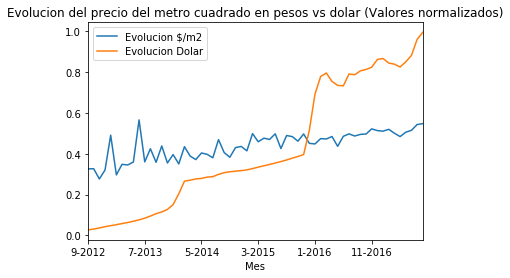

In [46]:
propertiesAndDolar.plot(x="Mes", y=["Evolucion $/m2", "Evolucion Dolar"])
plt.title('Evolucion del precio del metro cuadrado en pesos vs dolar (Valores normalizados)')

#### ¿Podemos asociar el valor del salario mínimo a los precios de las propiedades?

Normalizamos los valores del metro cuadrado y del salario, y comparamos su variación.

In [47]:
salaryEvolution = pd.read_csv('data/economic/salario-minimo.csv')

In [48]:
max_value = salaryEvolution['salario_minimo'].max()
min_value = salaryEvolution['salario_minimo'].min()
normalized = (salaryEvolution['salario_minimo'] - min_value) / (max_value - min_value)

In [49]:
salaryEvolution['normalized'] = normalized

In [50]:
salaryEvolution['mes'] = pd.to_datetime(salaryEvolution['mes'], format = "%m-%Y")
salaryEvolution['year-month'] = salaryEvolution['mes'].map(lambda x: str(x.month) + '-' + str(x.year))
salaryEvolution['year'] = salaryEvolution['mes'].map(lambda x: x.year)
salaryEvolution['month'] = salaryEvolution['mes'].map(lambda x: x.month)

In [51]:
salaryByMonth = (salaryEvolution.groupby('year-month').mean().reset_index()).sort_values(by=['year','month'])
salaryByMonth = salaryByMonth.loc[:,['year-month', 'normalized']].rename(columns={'normalized':'value'})
salaryByMonth.rename(columns={'year-month':'Mes', 'value':'Evolucion salario minimo'}, inplace=True)

In [52]:
propertiesAndSalary = pd.merge(salaryByMonth, propertiesPriceGroupedByMonth, how='inner', on='Mes')

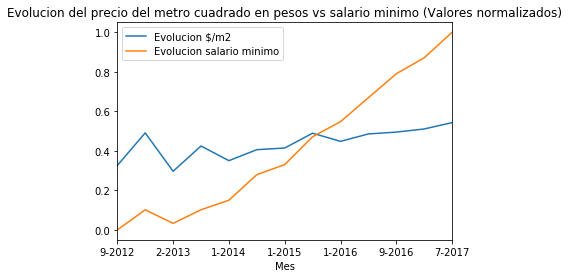

In [53]:
propertiesAndSalary.plot(x="Mes", y=["Evolucion $/m2", "Evolucion salario minimo"])
plt.title('Evolucion del precio del metro cuadrado en pesos vs salario minimo (Valores normalizados)')

#### ¿Podemos asociar la inflación a los precios de las propiedades?

In [54]:
inflationEvolution = pd.read_csv('data/economic/inflacion-argentina.csv')

In [55]:
inflationEvolution['FECHA'] = pd.to_datetime(inflationEvolution['FECHA'], format = "%d/%m/%Y")

In [56]:
inflationEvolution['year-month'] = inflationEvolution['FECHA'].map(lambda x: str(x.month) + '-' + str(x.year))
inflationEvolution['year'] = inflationEvolution['FECHA'].map(lambda x: x.year)
inflationEvolution['month'] = inflationEvolution['FECHA'].map(lambda x: x.month)

In [57]:
#Calculo variacion mes a mes de los precios del metro cuadrado
s = pd.Series([propertiesPriceGroupedByMonth.iloc[0]['Evolucion $/m2']])
s = s.append(propertiesPriceGroupedByMonth['Evolucion $/m2'])
sdf = s.reset_index()
propertiesPriceGroupedByMonth.reset_index(inplace=True)
propertiesPriceGroupedByMonth['previous'] = sdf[0]

propertiesPriceGroupedByMonth['var'] = propertiesPriceGroupedByMonth.apply(lambda x : (x['Evolucion $/m2']-x['previous'])/x['previous'], axis=1)

In [58]:
propertiesAndInflation = pd.merge(propertiesPriceGroupedByMonth, inflationEvolution, how='inner', left_on='Mes', right_on='year-month')

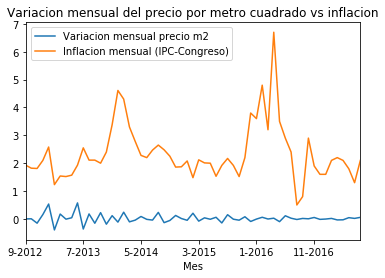

In [59]:
propertiesAndInflation.rename(columns={'var':'Variacion mensual precio m2', 'IPC-CONGRESO':'Inflacion mensual (IPC-Congreso)'}, inplace=True)
propertiesAndInflation.plot(x="Mes", y=["Variacion mensual precio m2", "Inflacion mensual (IPC-Congreso)"])
plt.title('Variacion mensual del precio por metro cuadrado vs inflacion')